In [1]:
from scipy.interpolate import UnivariateSpline
import numpy as np
from CeramicsPreprocessorRGK import CeramicsPreprocessorRGK
from FourierDescriptorMagnitude import FourierDescriptorMagnitude
import matplotlib.pyplot as plt 
import cv2 as cv 
from fourier_utils import *
from curvature import Curvature

In [2]:
path = "/home/michael/Desktop/test"
preprocessor = CeramicsPreprocessorRGK(path,['.png'])
out = preprocessor.run()
images = []
origs = []
for image, filename in zip(*out):
    images.append(image)
    origs.append(cv.imread(filename,cv.IMREAD_GRAYSCALE))

In [3]:
curv = Curvature(images, descriptor_harmonics=40, 
contour_points=50)
curvatures = curv.run(signed=True)

In [4]:
conts = curv.get_reconstructed_fds()

In [5]:
conts[1].shape

(50, 2)

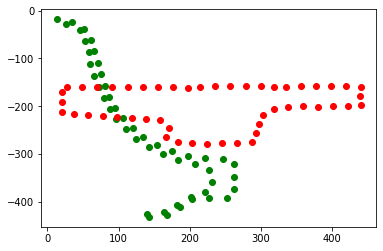

In [6]:
plt.scatter(conts[65][:,0], conts[65][:,1]*-1,color='g')
plt.scatter(conts[20][:,0], conts[20][:,1]*-1, color='r')

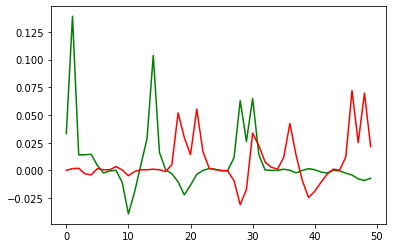

In [7]:
plt.plot(curvatures[63],'g')
plt.plot(curvatures[20],'r')

# TSNE

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE()
X_2d = tsne.fit_transform(curvatures)

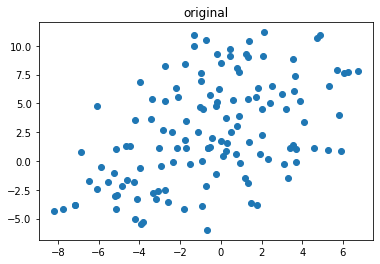

In [9]:
plt.title('original')
plt.scatter(X_2d[:,0],X_2d[:,1])

# kNN

In [10]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(curvatures)
distances, indices = nbrs.kneighbors(curvatures)

In [20]:
index = 44
print(indices[index])
print(distances[index])

[ 44 107  74  70 114]
[0.         0.18913339 0.23050653 0.25393336 0.25854252]


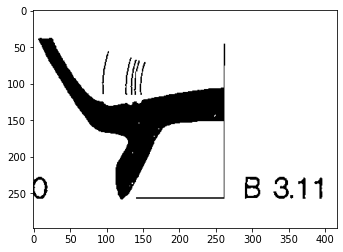

In [21]:
i = indices[index,0]
plt.imshow(origs[i],cmap='gray')

107


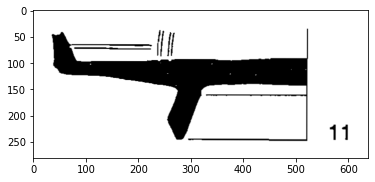

In [22]:
i = indices[index,1]
print(i)
plt.imshow(origs[i],cmap='gray')

74


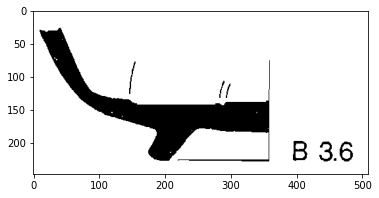

In [23]:
i = indices[index,2]
print(i)
plt.imshow(origs[i],cmap='gray')
